## Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)
import warnings
warnings.filterwarnings("ignore")
# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (12,8) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

root = '/Volumes/GoogleDrive/My Drive/DataMinin255/Project/InstaCart/Sample/'

## Data

In [2]:
aisles = pd.read_csv(root +'aisles.csv')
departments = pd.read_csv(root +'departments.csv')
orders = pd.read_csv(root +'orders.csv')
order_products_prior = pd.read_csv(root +'order_products__prior.csv')
order_products_train = pd.read_csv(root +'order_products__train.csv')
products = pd.read_csv(root +'products.csv')

Checking above dataframes

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


## EDA

### Let's find out how the data is divided into train and test set

In [9]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

#### Out of 206,209 customer data, the last order of 131,209 customers are put into train dataset and
#### last order of 75,000 customers are put into test dataset.

### Order Frequency of Customers

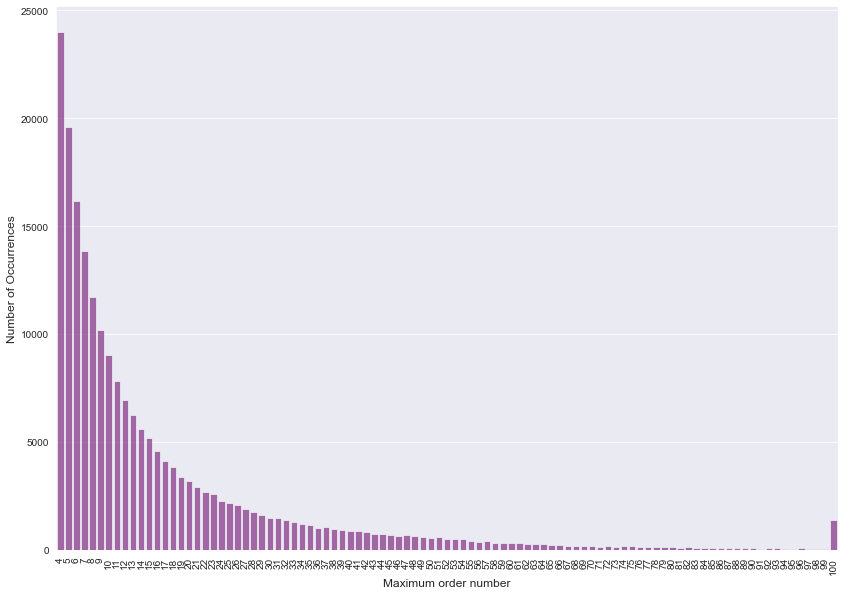

In [10]:
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()
pie, ax = plt.subplots(figsize=[14,10])
#plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.6, color='purple')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

It can be observed in this graph that most of the users has order atleast four products and there are no users who has ordered less than 4 products.

## Order Frequency in a Week

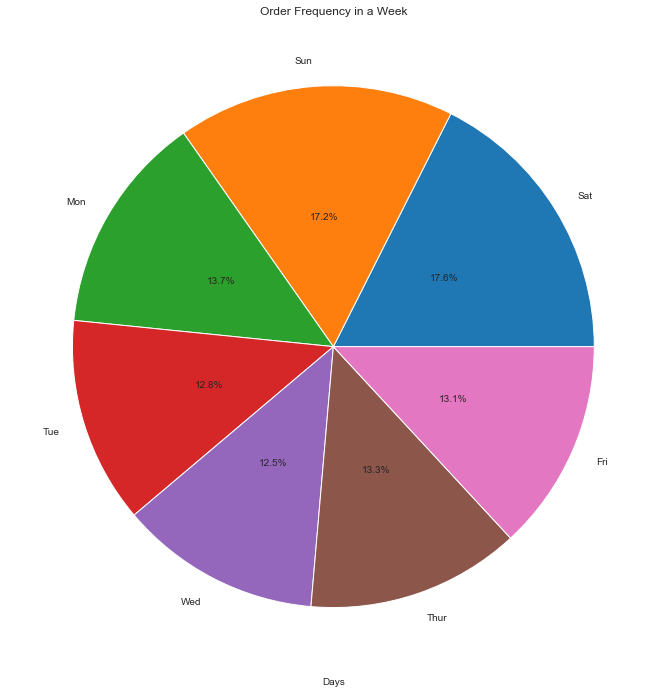

In [11]:
order_freq_week = orders['order_dow'].value_counts().sort_index()
order_freq_week.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
fig = plt.figure(figsize=(15,12))
#order_freq_week.plot(kind='bar', color='brown')
plt.pie(x=order_freq_week, autopct="%.1f%%", labels=order_freq_week.index,pctdistance=0.5)
plt.xticks(rotation=0)
plt.title('Order Frequency in a Week')
plt.xlabel('Days')
plt.show()

## Order Frequency for Hour of the Day

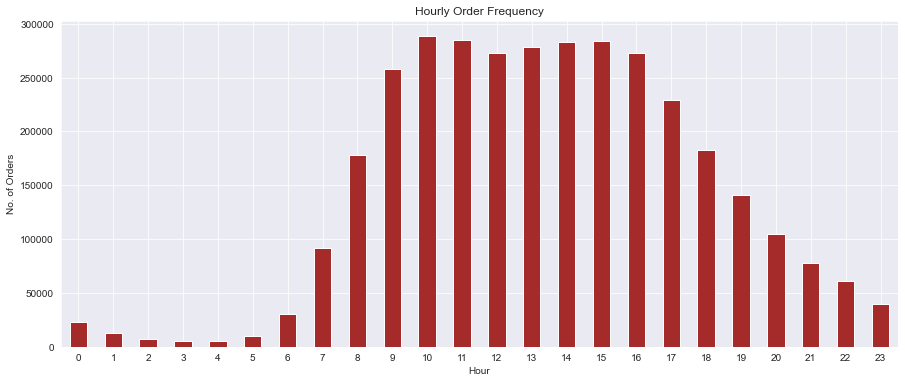

In [12]:
order_freq_hour = orders['order_hour_of_day'].value_counts().sort_index()
fig = plt.figure(figsize=(15,6))
order_freq_hour.plot(kind='bar', color='brown')
plt.xticks(rotation=0)
plt.title('Hourly Order Frequency')
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.show()

## Number of Orders in a week vs Hour of a day

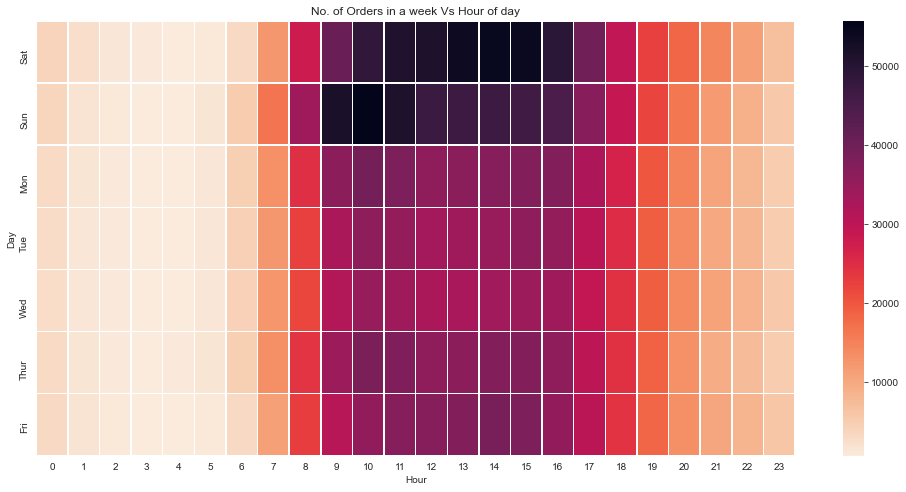

In [13]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

grouped_df.index=['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']

plt.figure(figsize=(17,8))
# sns.color_palette("viridis", as_cmap=True)
sns.heatmap(grouped_df, linewidths=.5, cmap='rocket_r')
plt.title("No. of Orders in a week Vs Hour of day")
plt.xlabel('Hour')
plt.ylabel('Day')
plt.show()

## Re-Order Interval

In [14]:
order_interval_count = orders.groupby('days_since_prior_order')['user_id'].agg('count')


In [15]:
print(order_interval_count)

days_since_prior_order
0.0      67755
1.0     145247
2.0     193206
3.0     217005
4.0     221696
5.0     214503
6.0     240013
7.0     320608
8.0     181717
9.0     118188
10.0     95186
11.0     80970
12.0     76146
13.0     83214
14.0    100230
15.0     66579
16.0     46941
17.0     39245
18.0     35881
19.0     34384
20.0     38527
21.0     45470
22.0     32012
23.0     23885
24.0     20712
25.0     19234
26.0     19016
27.0     22013
28.0     26777
29.0     19191
30.0    369323
Name: user_id, dtype: int64


In [16]:
#df = orders.loc[orders['user_id']== 1]
df1 = orders.loc[orders['days_since_prior_order']== 7]
df1.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.206080e+05,320608.000000,320608.000000,320608.00000,320608.000000,320608.0
mean,1.712503e+06,102896.196988,18.448133,2.55939,12.996525,7.0
std,9.887862e+05,59629.509399,15.365493,2.18049,4.112078,0.0
min,4.000000e+00,3.000000,2.000000,0.00000,0.000000,7.0
25%,8.571812e+05,51125.000000,7.000000,1.00000,10.000000,7.0
50%,1.713001e+06,102863.000000,14.000000,2.00000,13.000000,7.0
75%,2.571010e+06,154464.000000,26.000000,5.00000,16.000000,7.0
max,3.421078e+06,206209.000000,100.000000,6.00000,23.000000,7.0


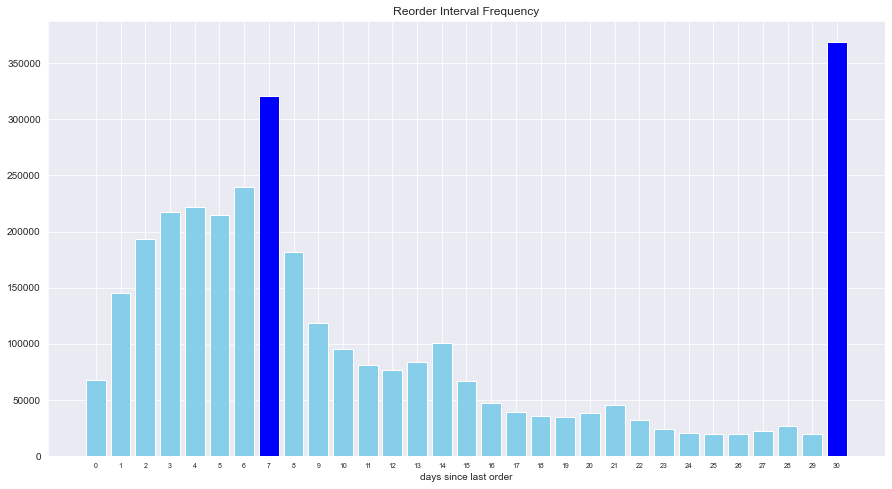

In [17]:

fig = plt.figure(figsize=(15,8))
color_list = ['skyblue'] * len(order_interval_count.index)
color_list[7] = 'blue'
color_list[30] = 'blue'    
plt.bar(order_interval_count.index, order_interval_count, color=color_list)
plt.xticks(np.arange(len(order_interval_count.index)), rotation=0,fontsize=7)
plt.xlabel('days since last order')
plt.title('Reorder Interval Frequency')
plt.show()
fig.set_dpi(200)

In [18]:
new_df = orders.groupby('days_since_prior_order')['order_id']
new_df.head()

0       2539329
1       2398795
2        473747
3       2254736
4        431534
         ...   
1021      34647
1095    3065988
1116     917141
1122    1386615
1151    1934930
Name: order_id, Length: 160, dtype: int64

## Popular Items in Shopping Cart History

In this part, let's see what are the most popular items on customers' order lists.

First take a look at each dataset, and then merge them into one dataframe with all the following included:
* user_id
* order_id
* product_id
* product_name

In [19]:
# All orders (prior & train): order_id, product_id
All_Order_Product=pd.concat([order_products_prior, order_products_train])

In [20]:
# orders in prior/train merged with product names
Order_Product_Name_Prior = pd.merge(order_products_prior, 
                                    products, how='left', on='product_id')
Order_Product_Name_Train = pd.merge(order_products_train, 
                                    products, how='left', on='product_id')

In [21]:
# Prior orders with user_id, product_id, product_name
Prior_User_Order_Product = pd.merge(Order_Product_Name_Prior, 
                                    orders, how='left', on='order_id')
Prior_User_Order_Product=pd.merge(Prior_User_Order_Product,departments, on ='department_id', how='left')
Prior_User_Order_Product=pd.merge(Prior_User_Order_Product,aisles, on ='aisle_id', how='left')

In [22]:
# Now we have all we need: order_id, product_id, user_id, product_name
Prior_User_Order_Product.head() 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


In [23]:
Prior_User_Order_Product.shape

(32434489, 15)

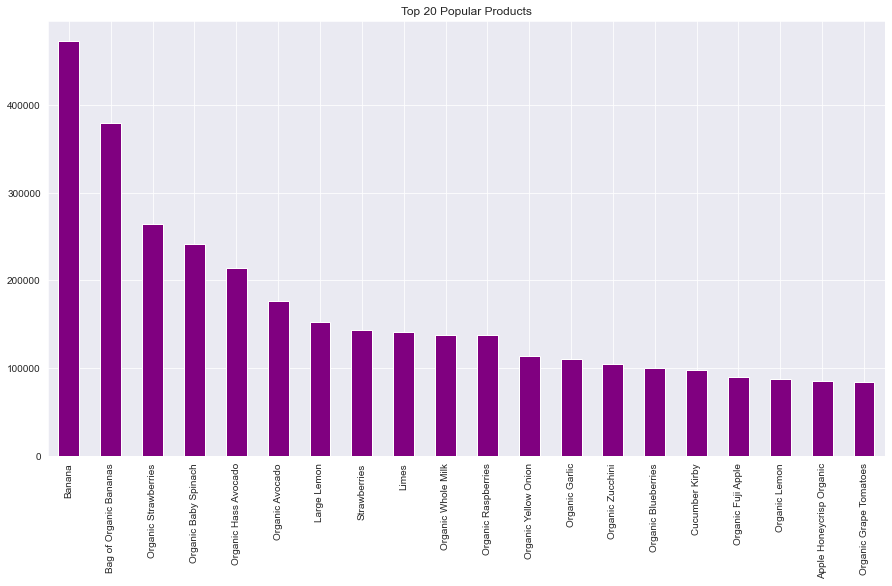

In [24]:
# top 20 most popular products
Products_Count = Prior_User_Order_Product['product_name'].value_counts()
fig = plt.figure(figsize=(15,8))
Products_Count[0:20].plot(kind="bar", color='purple')
plt.xticks(rotation=90)
plt.title('Top 20 Popular Products')
plt.show()
#fig.set_dpi(200)
#fig.savefig('../figs/Top_20_Popular_Products.png')

In [25]:
products_tuple_list = [tuple(x) for x in Products_Count.reset_index().values]

In [26]:
dic = {}
for pair in products_tuple_list:
    key = pair[0]
#     print(type(key))
    value = pair[1]
#     print(type(value))
    if key in dic:
        reservedValue = dic[key]
        reservedValue += value 
    else:
        dic[key] = value

In [27]:
products_tuple_list

[('Banana', 472565),
 ('Bag of Organic Bananas', 379450),
 ('Organic Strawberries', 264683),
 ('Organic Baby Spinach', 241921),
 ('Organic Hass Avocado', 213584),
 ('Organic Avocado', 176815),
 ('Large Lemon', 152657),
 ('Strawberries', 142951),
 ('Limes', 140627),
 ('Organic Whole Milk', 137905),
 ('Organic Raspberries', 137057),
 ('Organic Yellow Onion', 113426),
 ('Organic Garlic', 109778),
 ('Organic Zucchini', 104823),
 ('Organic Blueberries', 100060),
 ('Cucumber Kirby', 97315),
 ('Organic Fuji Apple', 89632),
 ('Organic Lemon', 87746),
 ('Apple Honeycrisp Organic', 85020),
 ('Organic Grape Tomatoes', 84255),
 ('Seedless Red Grapes', 82689),
 ('Organic Cucumber', 80392),
 ('Honeycrisp Apple', 79769),
 ('Organic Baby Carrots', 76896),
 ('Organic Half & Half', 76360),
 ('Sparkling Water Grapefruit', 75886),
 ('Organic Large Extra Fancy Fuji Apple', 75165),
 ('Yellow Onions', 73167),
 ('Organic Gala Apples', 72846),
 ('Organic Baby Arugula', 72829),
 ('Carrots', 72736),
 ('Fresh Cau

In [28]:
from wordcloud import WordCloud

In [29]:
# percentage of re-orders in prior set #
order_products_prior.reordered.sum() / order_products_prior.shape[0]

0.5896974667922161

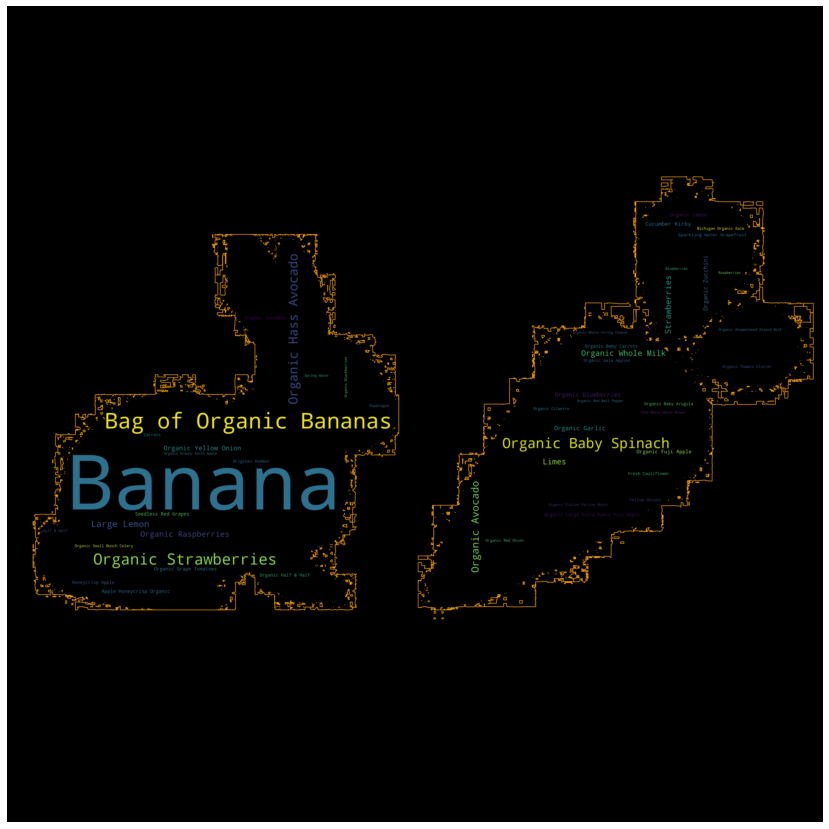

In [83]:
from wordcloud import WordCloud
from PIL import Image
fig = plt.figure(figsize=(15,15))
mask = np.array(Image.open(root +'Instacart.JPG'))
wordcloudData = WordCloud(
                          mask=mask, 
                          background_color="black",
                          max_font_size=400,
                          relative_scaling=1,
                          max_words = 50,
                          contour_width=3,
                          contour_color='orange'                       
                          ).generate_from_frequencies(frequencies = dic)
plt.imshow(wordcloudData, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.set_dpi(200)
# fig.savefig('../figs/wordcloud.png',bbox_inches='tight')

In [31]:
# percentage of re-orders in train set #
order_products_train.reordered.sum() / order_products_train.shape[0]

0.5985944127509629

In [32]:
grouped_df

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Sat,3936,2398,1409,963,813,1168,3329,12410,28108,40798,48465,51035,51443,53849,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
Sun,3674,1830,1105,748,809,1607,5370,16571,34116,51908,55671,51584,47079,46728,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
Mon,3059,1572,943,719,744,1399,4758,13245,24635,36314,39230,38128,35780,36650,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
Tue,2952,1495,953,654,719,1355,4562,12396,22553,32312,36040,35215,33455,34161,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
Wed,2642,1512,899,686,730,1330,4401,12493,21814,31409,35034,33857,32249,32751,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
Thur,3189,1672,1016,841,910,1574,4866,13434,24015,34232,38313,37915,35714,36296,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
Fri,3306,1919,1214,863,802,1136,3243,11319,22960,30839,35665,36994,37121,37564,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


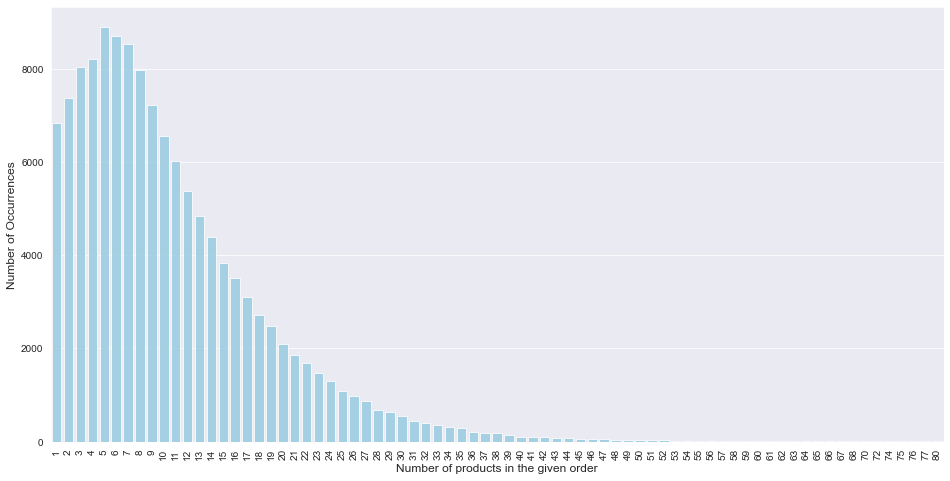

In [33]:
grouped_df = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='skyblue')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

## Data preparation

For Analysis, I am combining order_products_train and order_products_prior as order_products. Based on order_id, product_id, aisle_id and department_id I will merge those data with order_products and will create one single dataframe.

In [34]:
Prior_User_Order_Product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


In [35]:
Prior_User_Order_Product.tail()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,25247,prior,24,2,6,21.0,household,dish detergents
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,25247,prior,24,2,6,21.0,snacks,crackers
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,25247,prior,24,2,6,21.0,frozen,frozen breakfast
32434487,3421083,24852,9,1,Banana,24,4,25247,prior,24,2,6,21.0,produce,fresh fruits
32434488,3421083,5020,10,1,Organic Sweet & Salty Peanut Pretzel Granola ...,3,19,25247,prior,24,2,6,21.0,snacks,energy granola bars


In [36]:
Prior_User_Order_Product.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   product_name            object 
 5   aisle_id                int64  
 6   department_id           int64  
 7   user_id                 int64  
 8   eval_set                object 
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
 13  department              object 
 14  aisle                   object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.9+ GB


#### Reducing memory usage for faster analysis

In [37]:
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [38]:
Prior_User_Order_Product = reduce_memory(Prior_User_Order_Product)

Memory usage of properties dataframe is : 3959.2882080078125  MB

___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  1948.7121648788452  MB
This is  49.21875 % of the initial size


#### Deleting varibales that I do not need anymore

## Analysis

In [39]:
temp_df=Prior_User_Order_Product.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()
temp_df

,aisle,total,reorders
0,fresh fruits,3642188,2615469.0
1,fresh vegetables,3418021,2032172.0
2,packaged vegetables fruits,1765313,1127177.0
3,yogurt,1452343,997018.0
4,packaged cheese,979763,573383.0
...,...,...,...
129,eye ear care,8974,1950.0
130,baby bath body care,8581,2538.0
131,baby accessories,8160,4496.0
132,beauty,6168,1308.0


### Aisles

#### Total Orders and Reorders From Most Popular Aisles

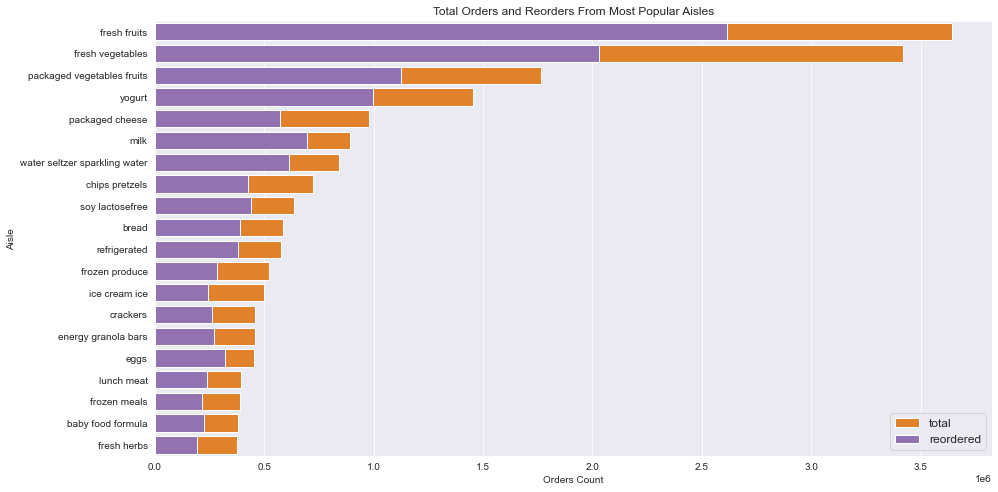

In [40]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color=color[1], label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color=color[4], label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Orders Count")
ax.set_title("Total Orders and Reorders From Most Popular Aisles")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [41]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

#### 20 Aisles with Highest Reorder Ratio

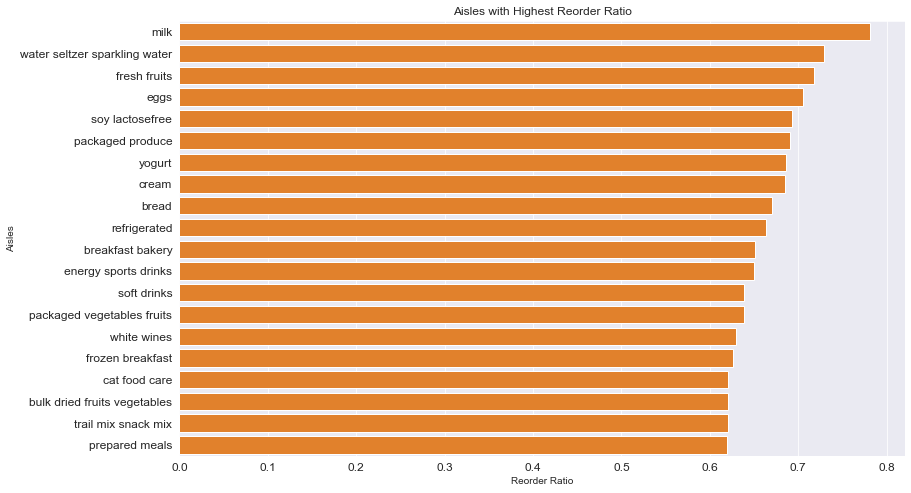

In [42]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[1])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

In [43]:
Prior_User_Order_Product.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,produce,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,pantry,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,pantry,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,pantry,baking ingredients


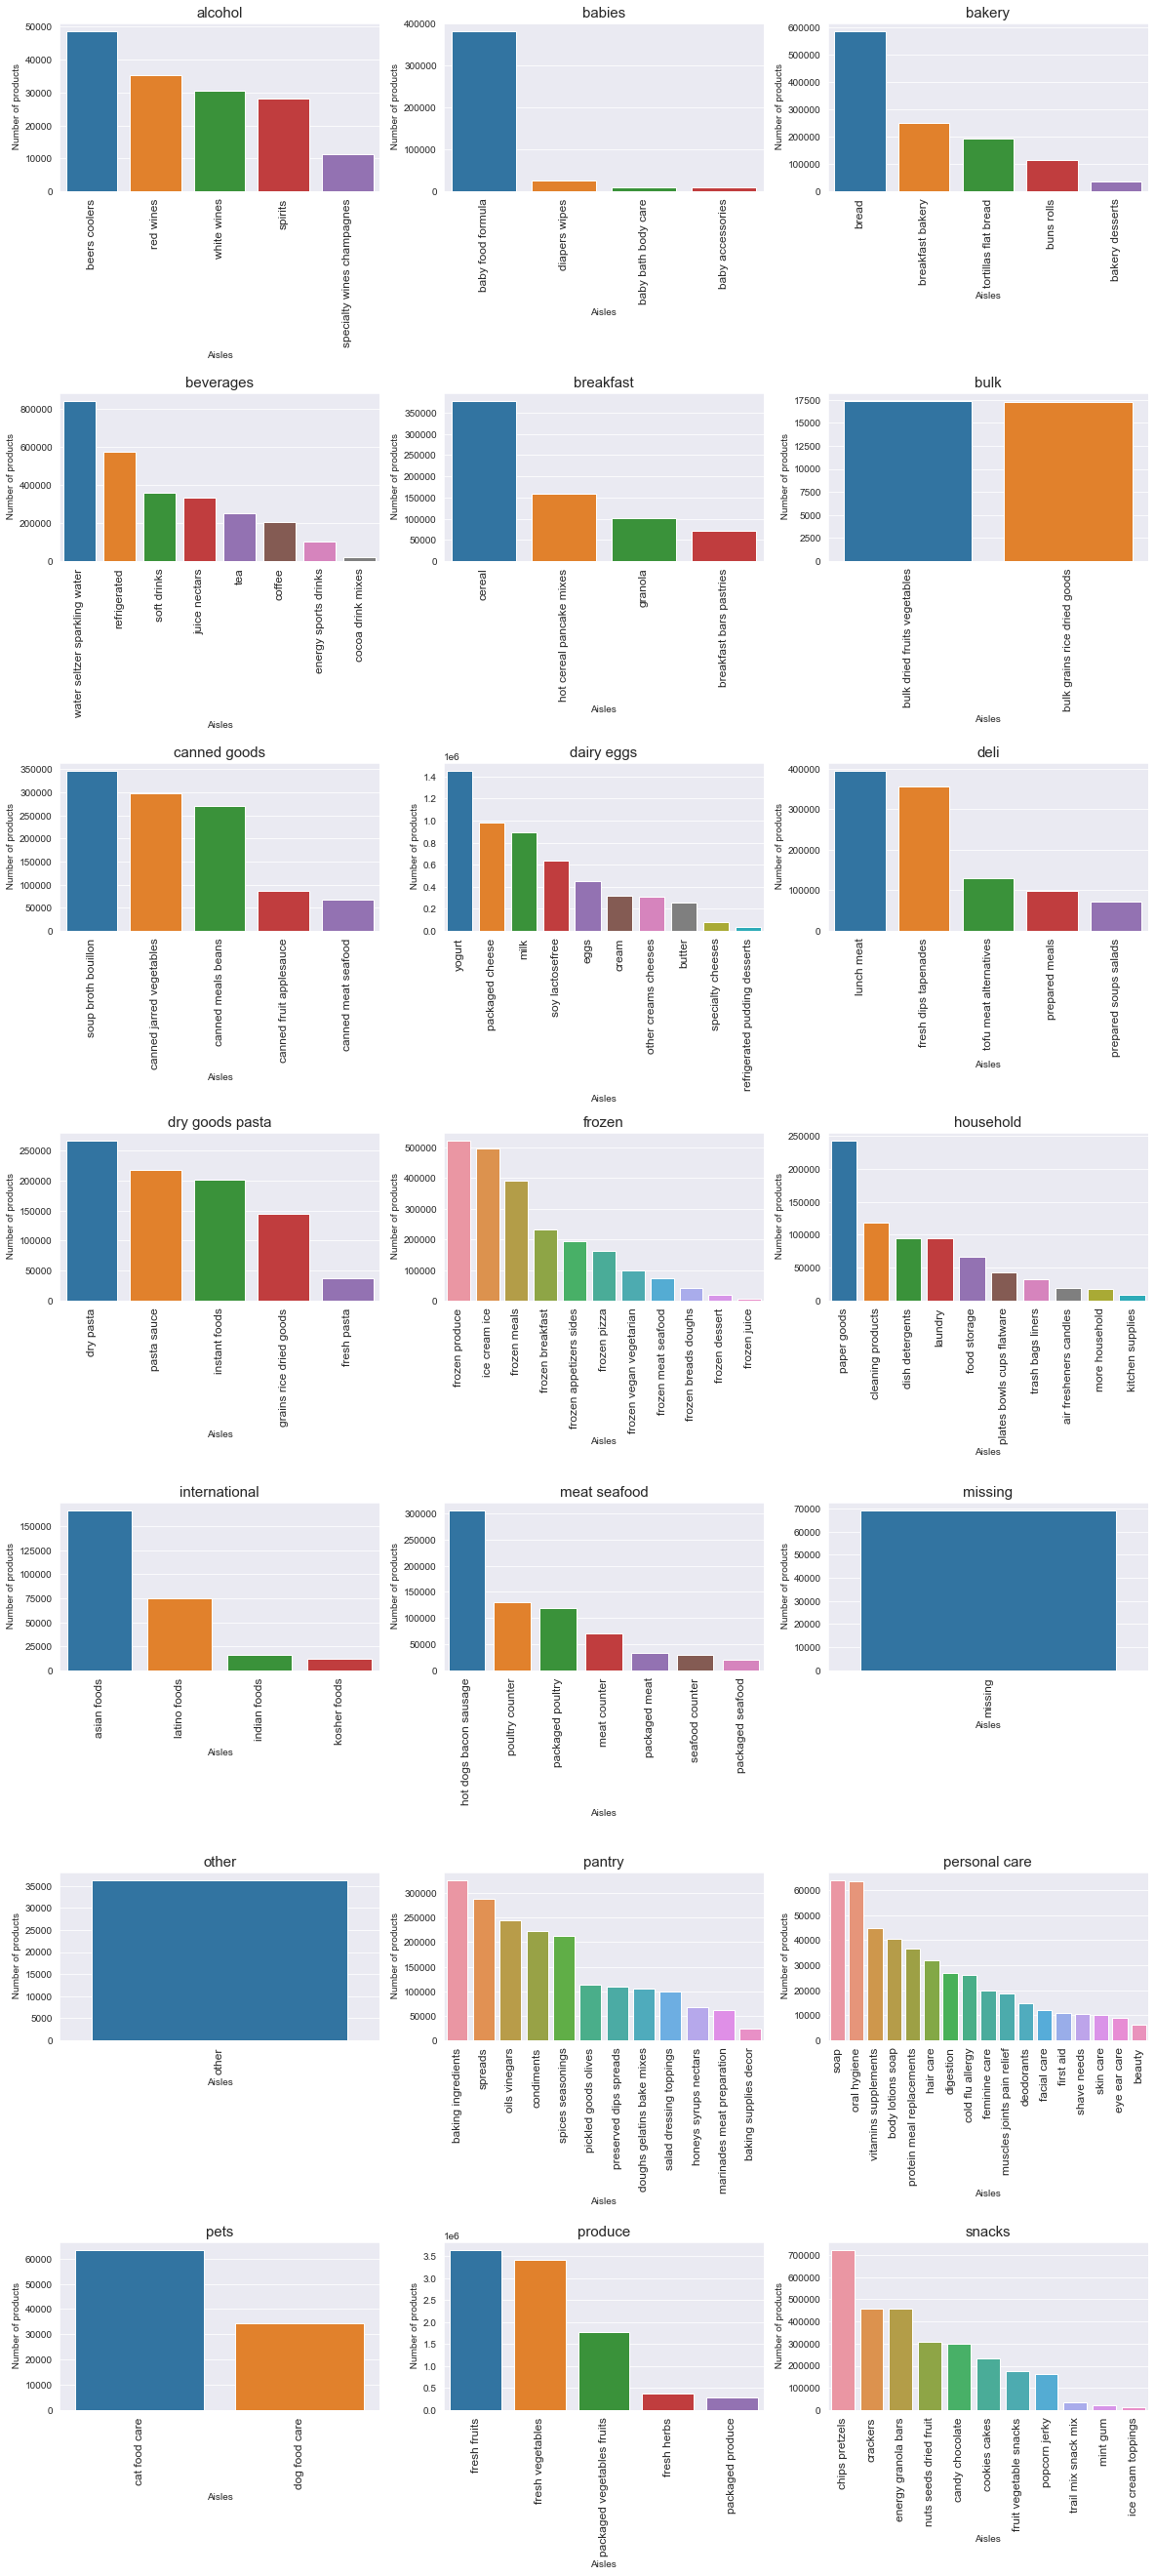

In [44]:
grouped = Prior_User_Order_Product.groupby(["department", "aisle"])["product_id"].agg(['count']).rename(columns={'count':'total'}).reset_index()
grouped.sort_values(by='total', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.2))
for (aisle, group), ax in zip(grouped.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, group.total , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = group.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)



#### 20 Aisles with Lowest Reorder Ratio

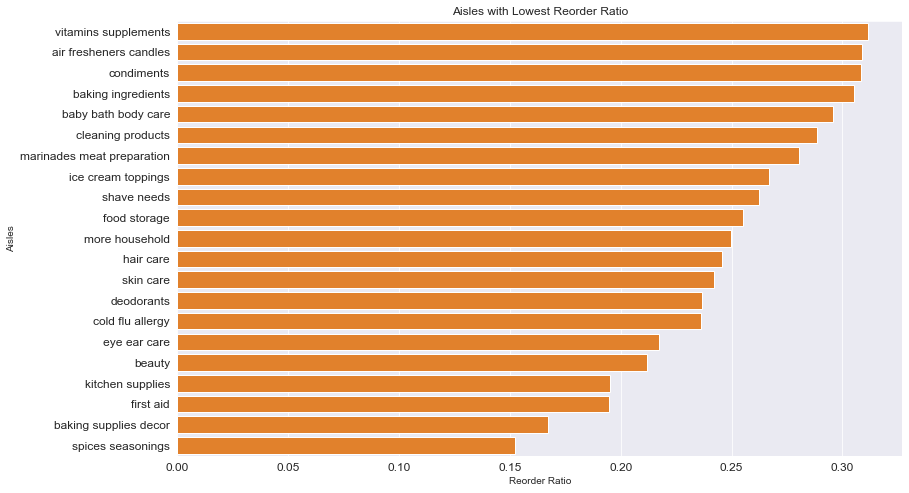

In [45]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[1])
ax.set_ylabel("Aisles")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Aisles with Lowest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

### Departments

In [46]:
temp_df = Prior_User_Order_Product.groupby("department")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

#### Total Orders and Reorders From Departments

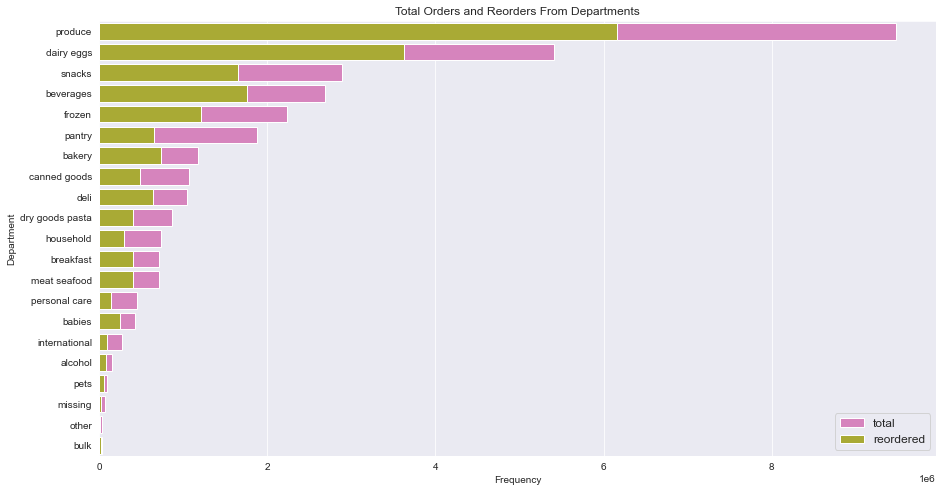

In [47]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(y = temp_df.department, x = temp_df["total"], color=color[6], label = "total")
ax = sns.barplot(y = temp_df.department, x = temp_df["reorders"], color=color[8], label = "reordered")
ax.set_ylabel("Department")
ax.set_xlabel("Frequency")
ax.legend(loc = 4, prop={'size': 12})
ax.set_title("Total Orders and Reorders From Departments")
plt.show()

In [48]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

#### Departments with Highest Reorder Ratio

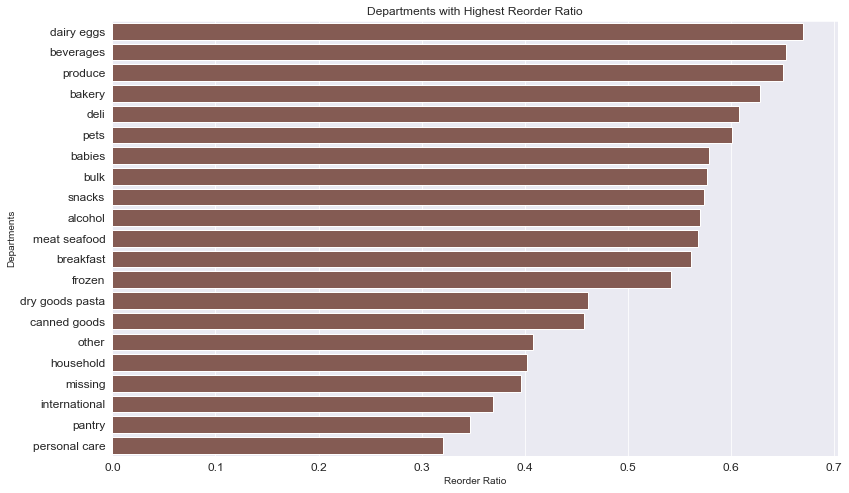

In [49]:
fig, ax = plt.subplots(figsize = (13,8))
ax = sns.barplot(y = temp_df.department, x = temp_df.reorder_ratio, color=color[5])
ax.set_ylabel("Departments")
ax.set_xlabel("Reorder Ratio")
ax.set_title("Departments with Highest Reorder Ratio")
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

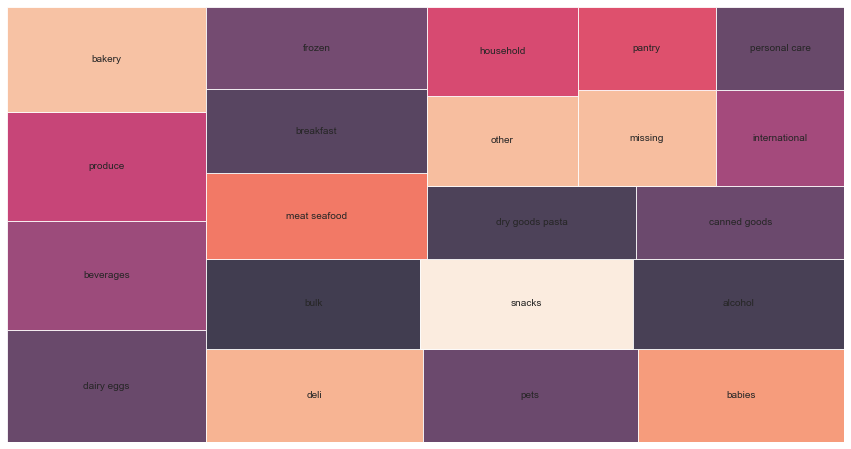

In [50]:
import squarify    # pip install squarify (algorithm for treemap)
fig, ax = plt.subplots(figsize = (15,8))
# plot it
squarify.plot(sizes=temp_df.reorder_ratio, label=temp_df.department, alpha=.8 )
plt.axis('off')
plt.show()

### Products

In [51]:
temp_df = Prior_User_Order_Product.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

#### Most Popular Products

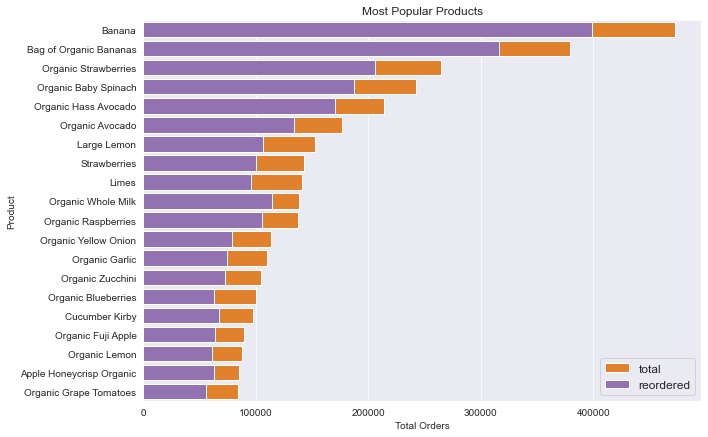

In [52]:
fig, ax = plt.subplots(figsize = (10,7))
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.total[0:20], color=color[1], label = "total")
ax = sns.barplot(y = temp_df.product_name[0:20], x = temp_df.reorders[0:20], color=color[4], label = "reordered")
ax.set_ylabel("Product")
ax.set_xlabel("Total Orders")
ax.set_title("Most Popular Products")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

In [53]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23522,Raw Veggie Wrappers,68,64.0,0.941176
21266,Serenity Ultimate Extrema Overnight Pads,87,81.0,0.931034
39641,Orange Energy Shots,13,12.0,0.923077
19939,Chocolate Love Bar,101,93.0,0.920792
30222,Soy Powder Infant Formula,35,32.0,0.914286
27687,Simply Sleep Nighttime Sleep Aid,45,41.0,0.911111
34768,"Energy Shot, Grape Flavor",22,20.0,0.909091
24772,Sparking Water,60,54.0,0.900000
19996,Maca Buttercups,100,90.0,0.900000
31726,Russian River Valley Reserve Pinot Noir,30,27.0,0.900000


#### Product Users

In [54]:
product_unique_users = Prior_User_Order_Product.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3676,Banana,73956
3471,Bag of Organic Bananas,63537
31920,Organic Strawberries,58838
28840,Organic Baby Spinach,55037
22413,Large Lemon,46402
23420,Limes,44859
30297,Organic Hass Avocado,43453
42904,Strawberries,43149
28804,Organic Avocado,42771
29008,Organic Blueberries,37138


In [55]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37375,Raw Veggie Wrappers,4,68,64.0,0.941176
39866,Serenity Ultimate Extrema Overnight Pads,6,87,81.0,0.931034
28412,Orange Energy Shots,1,13,12.0,0.923077
8535,Chocolate Love Bar,8,101,93.0,0.920792
41719,Soy Powder Infant Formula,3,35,32.0,0.914286
40454,Simply Sleep Nighttime Sleep Aid,4,45,41.0,0.911111
13842,"Energy Shot, Grape Flavor",2,22,20.0,0.909091
38789,Russian River Valley Reserve Pinot Noir,3,30,27.0,0.900000
24024,Maca Buttercups,10,100,90.0,0.900000
41798,Sparking Water,6,60,54.0,0.900000


#### Cumulative Sum of Unique Users Per Product

In [56]:
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,73956,472565,398609.0,0.843501,73956
1,Bag of Organic Bananas,63537,379450,315913.0,0.832555,137493
2,Organic Strawberries,58838,264683,205845.0,0.777704,196331
3,Organic Baby Spinach,55037,241921,186884.0,0.772500,251368
4,Large Lemon,46402,152657,106255.0,0.696038,297770


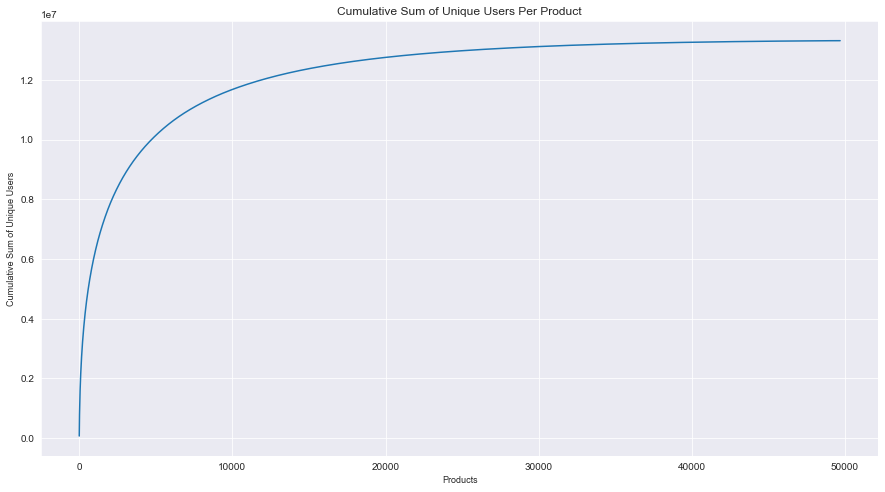

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Products", size = 9)
ax.set_ylabel("Cumulative Sum of Unique Users", size = 9)
ax.set_title("Cumulative Sum of Unique Users Per Product", size = 12)
plt.show()

#### Total Product Orders VS Total Unique Product Buyers

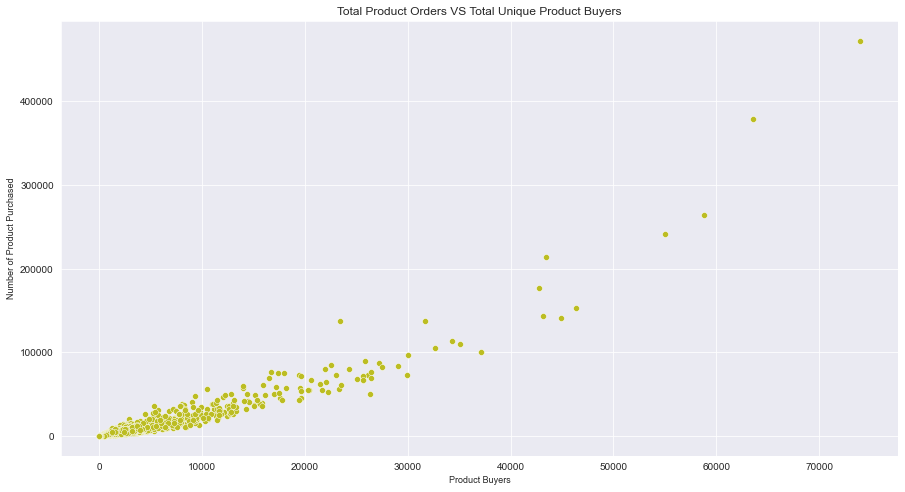

In [58]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users, color = color[8])
ax.set_xlabel("Product Buyers", size = 9)
ax.set_ylabel("Number of Product Purchased", size = 9)
ax.set_title("Total Product Orders VS Total Unique Product Buyers", size = 12)
plt.show()

#### Reorder Percentage VS Total Orders

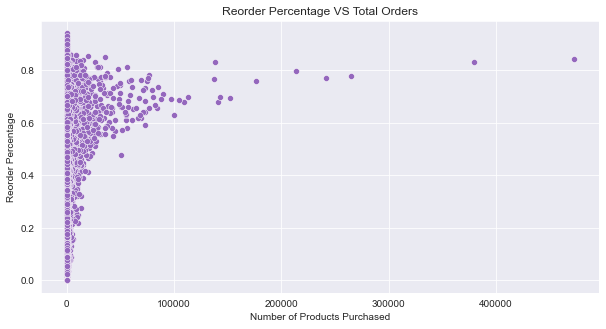

In [59]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[4])
ax.set_xlabel("Number of Products Purchased")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Orders")
plt.show()

#### Reorder Percentage VS Total Unique Users

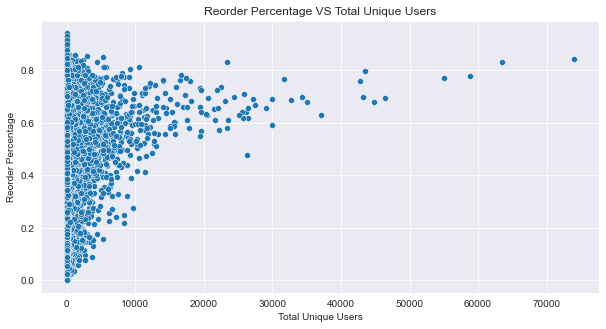

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel("Total Unique Users")
ax.set_ylabel("Reorder Percentage")
ax.set_title("Reorder Percentage VS Total Unique Users")
plt.show()

#### Organic Vs Inorganic

In [61]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,520,777,257.0,0.330759,False
1,#2 Cone White Coffee Filters,10,13,3.0,0.230769,False
2,#2 Mechanical Pencils,8,8,0.0,0.000000,False
3,#4 Natural Brown Coffee Filters,152,241,89.0,0.369295,False
4,& Go! Hazelnut Spread + Pretzel Sticks,77,164,87.0,0.530488,False


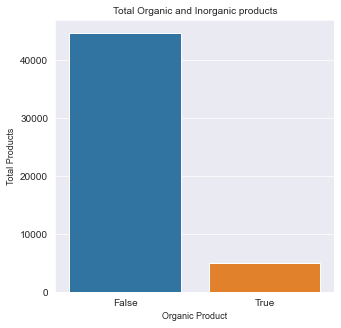

In [62]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Total Products", size = 9)
ax.set_title("Total Organic and Inorganic products", size = 10)
plt.show()

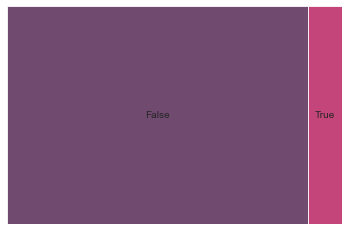

In [63]:
import squarify    # pip install squarify (algorithm for treemap)

# plot it
squarify.plot(sizes=product_unique_users.groupby('Organic').size().values, label=product_unique_users.groupby('Organic').size().index, alpha=.8 )
plt.axis('off')
plt.show()

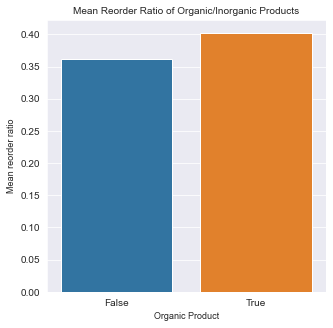

In [64]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Organic Product", size = 9)
ax.set_ylabel("Mean reorder ratio", size = 9)
ax.set_title("Mean Reorder Ratio of Organic/Inorganic Products", size = 10)
plt.show()

#### Add to Cart Order VS Reorder  

In [65]:
temp_df = Prior_User_Order_Product.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

,add_to_cart_order,reordered
0,1,0.677533
1,2,0.676251
2,3,0.658037
3,4,0.636958
4,5,0.617383


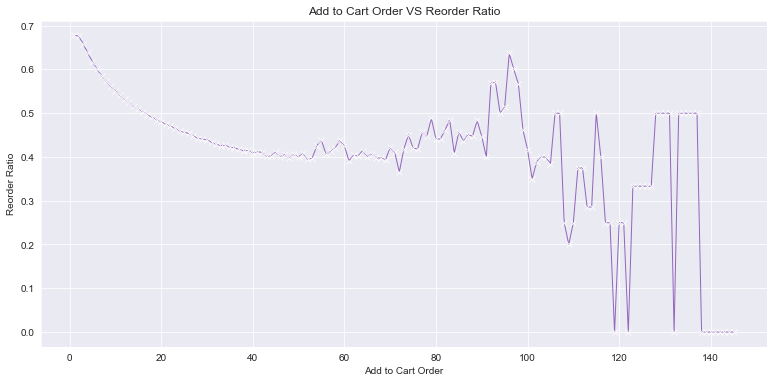

In [66]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='x', color = color[4])
ax.set_xlabel("Add to Cart Order")
ax.set_ylabel("Reorder Ratio")
ax.set_title("Add to Cart Order VS Reorder Ratio")
plt.show()

#### Most Popular Products on different days

In [67]:
temp_df = Prior_User_Order_Product.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

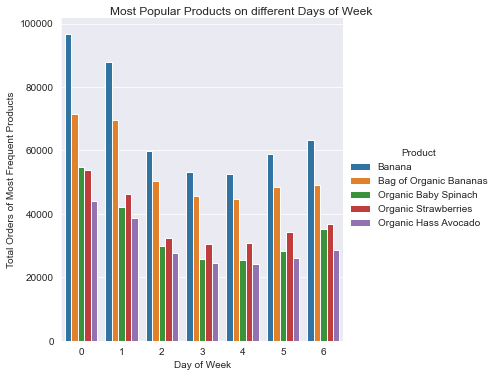

In [68]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Product")
ax.set_axis_labels("Day of Week", "Total Orders of Most Frequent Products")
ax.fig.suptitle("Most Popular Products on different Days of Week", va="baseline", ha="center")
ax.savefig("Most Popular Products on Different Days of Week.png")